[('0-3 hrs. (Night)', 390197), ('3-6 hrs. (Night)', 474926), ('6-9 hrs (Day)', 671864), ('9-12 hrs (Day)', 859444), ('12-15 hrs (Day)', 824089), ('15-18 hrs (Day)', 906639), ('18-21 hrs (Night)', 873630), ('21-24 hrs (Night)', 602117)]
Timespan of maximum accidents:('15-18 hrs (Day)', 906639)
Timespan of minimum accidents:('0-3 hrs. (Night)', 390197)
State with maximum accidents:('Tamil Nadu', 852073)
State with minimum accidents:('Lakshadweep', 14)
[(2001, 323720), (2002, 335707), (2003, 336468), (2004, 361343), (2005, 390378), (2006, 394432), (2007, 418657), (2008, 415855), (2009, 421628), (2010, 430654), (2011, 440123), (2012, 440042), (2013, 443001), (2014, 450898)]
Year with maximum accidents:(2014, 450898)
Year with minimum accidents:(2001, 323720)


{(2001, 9249.1428571428569),
 (2002, 9591.6285714285714),
 (2003, 9613.3714285714286),
 (2004, 10324.085714285715),
 (2005, 11153.657142857142),
 (2006, 11269.485714285714),
 (2007, 11961.628571428571),
 (2008, 11881.571428571429),
 (2009, 12046.514285714286),
 (2010, 12304.4),
 (2011, 12574.942857142858),
 (2012, 12572.628571428571),
 (2013, 12657.171428571428),
 (2014, 12882.799999999999)}

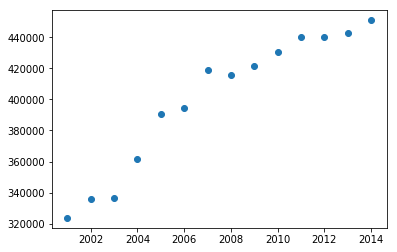

In [37]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression

data = pd.read_csv('road-accidents-in-india/only_road_accidents_data3.csv')

data.head()


i=0
data = data.drop('Total',1)
new_data = pd.DataFrame(columns = ['STATE/UT','YEAR','TIME','ACCIDENTS'],index = np.arange(10000))
for states in data['STATE/UT'].unique():
    for year in data['YEAR'].unique():
        for time in data.columns[2:]:
            new_data.loc[i,'STATE/UT']= states
            new_data.loc[i,'YEAR']= year
            new_data.loc[i,'TIME']= time
            i=i+1   

#new_data.head()

j=0
for i in data.index:
    for time in data.columns[2:]:
        new_data.loc[j,'ACCIDENTS'] = data.loc[i,time]
        j=j+1
    

new_data.head()
new_data = new_data.dropna(how='all',axis=0)
new_data.head()

new_data.to_csv('Prepared data v1.csv')

data = pd.read_csv('road-accidents-in-india/only_road_accidents_data3.csv')

cnt =0
for states in new_data['STATE/UT'].unique():
    for i in new_data.index :
        if new_data.loc[i,'STATE/UT'] == states:
            cnt=cnt+1
        
    #print(states +' has '+str(cnt)+' data items')
    cnt=0

#to find the timespan of max and min accidents
c= []
cnt = 0
for time in data.columns[2:10]:
    for i in data.index:
        cnt  = cnt + data.loc[i,time]
    time_acc = (time,cnt)
    cnt=0
    c.append(time_acc)
print(c) 
x = c[0]
y = c[0]
for i in c:
    if i[1]>x[1]:
        x = i
    if i[1] <y[1]:
        y=i
        
print("Timespan of maximum accidents:"+ str(x))
print("Timespan of minimum accidents:" + str(y))

#to find state with max and min accidents occured
d= []
cnt1 = 0
for state in data['STATE/UT'].unique():
    for i in data.index:
        if data.loc[i,'STATE/UT'] == state:
            cnt1 = cnt1 + data.loc[i,'Total'] 
    state_acc = (state,cnt1)
    cnt1=0
    d.append(state_acc)
#print(c) 
x = d[0]
y = d[0]
for i in d:
    if i[1]>x[1]:
        x = i
    if i[1] <y[1]:
        y=i
print("State with maximum accidents:"+ str(x))
print("State with minimum accidents:" + str(y))       
        

#to find state with max and min accidents occured
e= []
cnt2 = 0
for year in data['YEAR'].unique():
    for i in data.index:
        if data.loc[i,'YEAR'] == year:
            cnt2 = cnt2 + data.loc[i,'Total'] 
    year_acc = (year,cnt2)
    cnt2=0
    e.append(year_acc)
#print(c) 
x = e[0]
y = e[0]
for i in e:
    if i[1]>x[1]:
        x = i
    if i[1] <y[1]:
        y=i
print(e)
print("Year with maximum accidents:"+ str(x))
print("Year with minimum accidents:" + str(y))    



model = LinearRegression()
model.fit(np.array([t[0] for t in e]).reshape(len(e),1),np.array([y[1] for y in e]))
plt.scatter(np.array([t[0] for t in e]),np.array([y[1] for y in e]))

model.predict([i for i in np.array([t[0] for t in e]).reshape(len(e),1)])
model.predict(2015)
data = pd.read_csv('road-accidents-in-india/only_road_accidents_data3.csv')




state_acc = []
data = pd.read_csv('road-accidents-in-india/only_road_accidents_data3.csv')
state_acc_mean =[]
for state in data['STATE/UT'].unique():
    for i in data.index:
        if data.loc[i,'STATE/UT'] == state :
            state_acc.append(data.loc[i,'Total'])
    mean = np.mean(state_acc)
    state_mean =(state,mean)
    state_acc_mean.append(state_mean)
    mean =0
    state_acc =[]
state_acc_mean=set(list(state_acc_mean))
state_acc_mean





year_acc_mean=[]
year_acc =[]
data = pd.read_csv('road-accidents-in-india/only_road_accidents_data3.csv')

for year in data['YEAR'].unique():
    for i in data.index:
        if data.loc[i,'YEAR'] == year :
            year_acc.append(data.loc[i,'Total'])
    mean = np.mean(year_acc)
    year_mean =(year,mean)
    year_acc_mean.append(year_mean)
    mean =0
    year_acc =[]
year_acc_mean=set(list(year_acc_mean))
year_acc_mean

